In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# generating data set 

n0 = 200
n1 = 200

mu = [0, 0]
sigma = [[0.9, -0.4],
         [-0.4, 0.3]]

np.random.seed(0)
x0 = np.random.multivariate_normal([2.5,2.5], sigma, n0).T        # data in class 0
x1 = np.random.multivariate_normal([1,1], sigma, n1).T            # data in class 1

x0 = np.asmatrix(x0)
x1 = np.asmatrix(x1)

In [3]:
mu0 = np.mean(x0, axis = 1)
mu1 = np.mean(x1, axis = 1)

S0 = 1/(n0 - 1)*(x0 - mu0)*(x0 - mu0).T
S1 = 1/(n1 - 1)*(x1 - mu1)*(x1 - mu1).T

w = (n0*S0 + n1*S1).I*(mu0 - mu1)
print(w)

[[0.02559164]
 [0.04502689]]


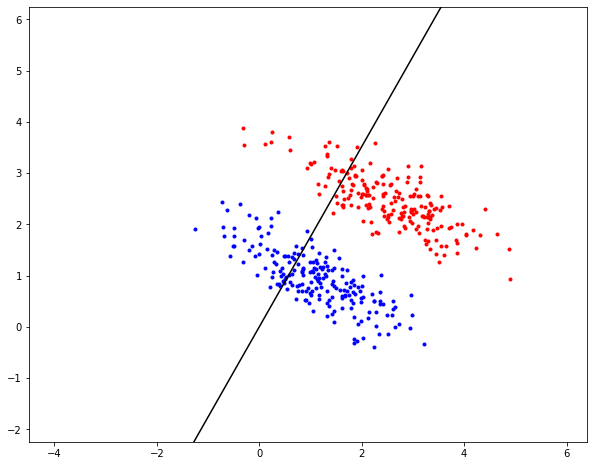

In [6]:
plt.figure(figsize = (10, 8))
plt.plot(x0[0,:], x0[1,:], 'r.')
plt.plot(x1[0,:], x1[1,:], 'b.')

xp = np.arange(-4, 6, 0.1)
yp = w[1,0]/w[0,0]*xp
plt.plot(xp, yp, 'k')
plt.axis('equal')
plt.ylim([-2, 6])
plt.show()

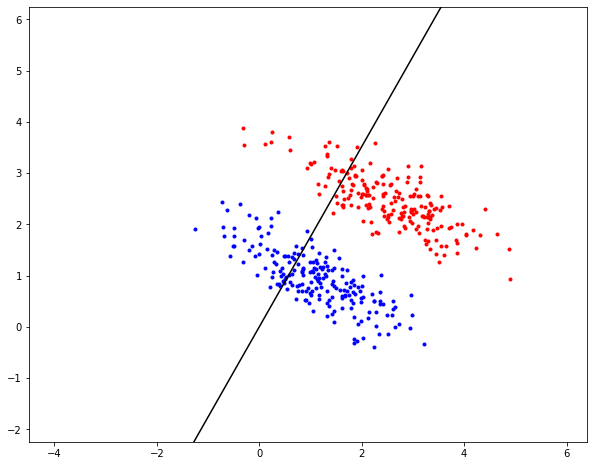

In [6]:
thres = w.T * 1/2 * (mu1-mu0)
plt.figure(figsize = (10, 8))
plt.plot(x0[0,:], x0[1,:], 'r.')
plt.plot(x1[0,:], x1[1,:], 'b.')

xp = np.arange(-4, 6, 0.1)
yp = (thres - w[0,0] * xp)/w[1,0]
plt.plot(xp, thres_p.T, 'k')
plt.axis('equal')
plt.ylim([-2, 6])
plt.show()

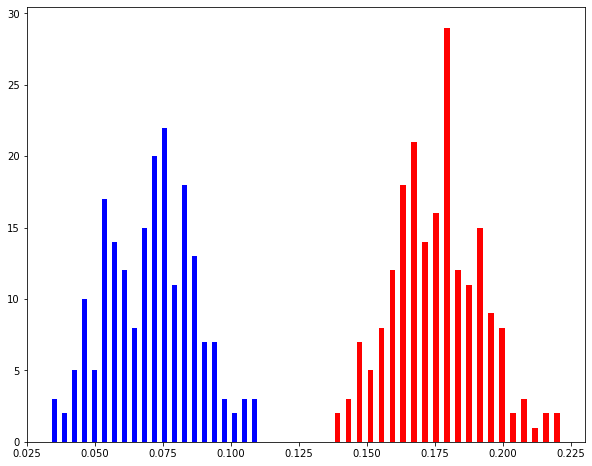

In [7]:
y1 = x0.T*w
y2 = x1.T*w

plt.figure(figsize = (10, 8))
plt.hist(y1, 21, color = 'r', rwidth = 0.5)
plt.hist(y2, 21, color = 'b', rwidth = 0.5)
plt.show()

## Scikit-learn

In [8]:
# reshape data

X = np.vstack([x0.T, x1.T])
y = np.vstack([np.ones([n0, 1]), np.zeros([n1, 1])])

In [9]:
from sklearn import discriminant_analysis

clf = discriminant_analysis.LinearDiscriminantAnalysis()
clf.fit(X, np.ravel(y))

LinearDiscriminantAnalysis()

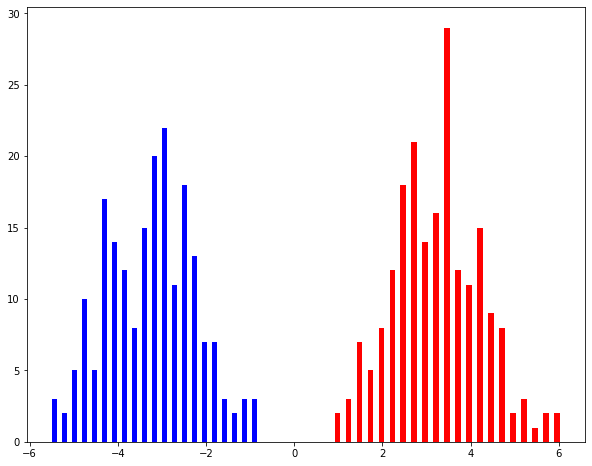

In [10]:
# projection

X_LDA = clf.transform(X)

plt.figure(figsize = (10, 8))
plt.hist(X_LDA[0:200], 21, color = 'r', rwidth = 0.5)
plt.hist(X_LDA[200:400], 21, color = 'b', rwidth = 0.5)
plt.show()